<a href="https://colab.research.google.com/github/subodh2708/deep-learning---tensorflow-2.0/blob/main/05_transfer_learning_in_tensorflow_part_2_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning in tensorflow part 2: fine tuning 

In [1]:
!nvidia-smi


Fri Aug 26 12:07:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-08-26 12:07:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-26 12:07:25 (117 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2022-08-26 12:07:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   233MB/s    in 0.7s    

2022-08-26 12:07:29 (233 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [6]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [7]:
import tensorflow as tf

IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory= train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory= test_dir,
                                                               image_size=  IMG_SIZE,
                                                               label_mode = "categorical",
                                                               batch_size =  BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data_10_percent


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [9]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
for images , labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.20000000e+01 0.00000000e+00 2.50000000e+01]
   [2.25969391e+01 0.00000000e+00 2.55969391e+01]
   [2.30000000e+01 0.00000000e+00 2.60000000e+01]
   ...
   [2.30000000e+01 0.00000000e+00 2.60000000e+01]
   [2.30000000e+01 0.00000000e+00 2.60000000e+01]
   [2.30000000e+01 0.00000000e+00 2.80000000e+01]]

  [[2.00000000e+01 0.00000000e+00 2.50000000e+01]
   [2.09336739e+01 9.33673680e-01 2.59336739e+01]
   [2.10306129e+01 9.84693944e-01 2.60000000e+01]
   ...
   [2.14285278e+01 7.85736084e-01 2.60000000e+01]
   [2.10000000e+01 1.00000000e+00 2.80000000e+01]
   [2.30000000e+01 0.00000000e+00 2.80000000e+01]]

  [[1.62091827e+01 0.00000000e+00 2.57857132e+01]
   [1.73571434e+01 0.00000000e+00 2.57857132e+01]
   [1.83571434e+01 7.85714149e-01 2.67857132e+01]
   ...
   [1.97857132e+01 2.14285851e-01 2.66632996e+01]
   [2.00000000e+01 0.00000000e+00 2.70000000e+01]
   [2.00000000e+01 0.00000000e+00 2.70000000e+01]]

  ...

  [[2.00000000e+01 0.00000000e+00 2.77857361e+01]
   [2

## model 0 - Building a transfer learning model using Keras Funcional API

In [11]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape= (224,224,3), name= "input_layer")
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f" shape after GlobalAveragePooling2D: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = "output_layers")(x)

model_0 = tf.keras.Model(inputs , outputs)

model_0.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs = 5,
                                 steps_per_epoch = len(train_data_10_percent),
                                 validation_data = test_data,
                                 validation_steps = int(0.25 * len(test_data)),
                                 callbacks = [create_tensorboard_callback(dir_name = "transfer learning ",
                                                                         experiment_name = "10_percent_feature_extraction")])

16719872/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
 shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer learning /10_percent_feature_extraction/20220826-120738
Epoch 1/5
24/24 [==============================] - 22s 253ms/step - loss: 1.8865 - accuracy: 0.4293 - val_loss: 1.3294 - val_accuracy: 0.7056
Epoch 2/5
24/24 [==============================] - 3s 128ms/step - loss: 1.1223 - accuracy: 0.7587 - val_loss: 0.9125 - val_accuracy: 0.7961
Epoch 3/5
24/24 [==============================] - 3s 129ms/step - loss: 0.8402 - accuracy: 0.8107 - val_loss: 0.7706 - val_accuracy: 0.8026
Epoch 4/5
24/24 [==============================] - 4s 177ms/step - loss: 0.6805 - accuracy: 0.8467 - val_loss: 0.6982 - val_accuracy: 0.8125
Epoch 5/5
24/24 [==============================] - 4s 177ms/step - loss: 0.5863 - accuracy: 0.8613 - val_loss: 0.6447 - val_accuracy: 0.8257


In [12]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.6109 - accuracy: 0.8416


[0.6109260320663452, 0.8416000008583069]

In [13]:
for layer_number , layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [14]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [15]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layers (Dense)       (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


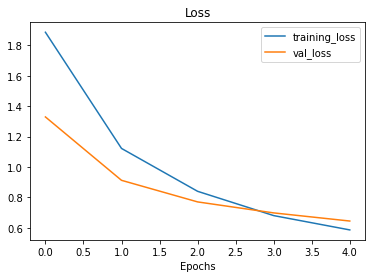

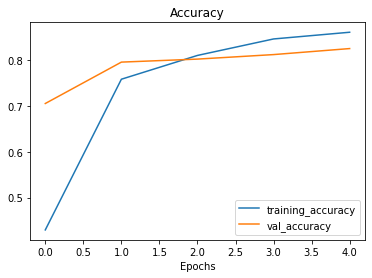

In [16]:
plot_loss_curves(history_10_percent)

## Getting a feature vector from a trained model

In [17]:
input_shape = (1,4,4,3)

tf.random.set_seed(42)

input_tensor = tf.random.normal(input_shape)
print(f"Random input shape: \n {input_tensor} \n ")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor: \n {global_average_pooled_tensor} \n")

print(f" shape of input tensor: {input_tensor.shape}")
print(f"shape of global average pooled 2D tenor: {global_average_pooled_tensor.shape}")

Random input shape: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 
 
2D global average pooled random tensor: 
 [[-0.09368646 -0.45840448 -0.2885598 ]] 

 shape of input tensor: (1, 4, 4, 3)
shape of global average pooled 2D tenor: (1, 3)


In [18]:
tf.reduce_mean(input_tensor, axis = [1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

## Running a series of experiment  on transfer learning

### Getting and preprocessing the data for model_1

In [19]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2022-08-26 12:08:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  51.1MB/s    in 2.5s    

2022-08-26 12:08:28 (51.1 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [20]:
train_dir = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [21]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There a

In [22]:
IMG_SIZE = (224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                           label_mode = 'categorical',
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = IMG_SIZE,
                                                                batch_size= BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [23]:
print(tf.__version__)

2.8.2


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [25]:
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
] , name = "data_augmentation")

(-0.5, 511.5, 414.5, -0.5)

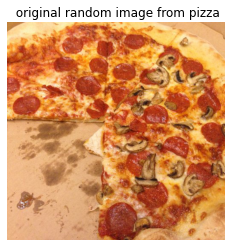

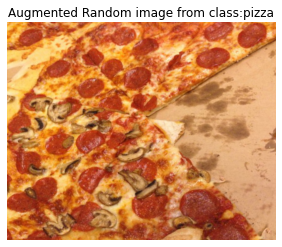

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f" original random image from {target_class}")
plt.axis(False)

augmented_img = data_augmentation(img, training = True)
plt.figure()
plt.imshow((augmented_img)/255)
plt.title(f"Augmented Random image from class:{target_class}")
plt.axis(False)

 ## model_1: feature transfer learning with 1% of data with data augmentation

In [27]:
input_shape = (224,224,3)

In [28]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

input = layers.Input(shape= input_shape, name = 'input_layers')

x = data_augmentation(input)

x = base_model(x , training = False)

x = layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation = 'softmax', name= 'output_layer')(x)

model_1 = tf.keras.Model(input, outputs)

model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_1_percent = model_1.fit(train_data_1_percent,
                                epochs = 5,
                                steps_per_epoch = len(train_data_1_percent),
                                validation_data = test_data,
                                validation_steps = int(0.25 * len(test_data)),
                                callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning',
                                                                         experiment_name = '1_percent_data_augment')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_augment/20220826-120832
Epoch 1/5


3/3 [==============================] - ETA: 0s - loss: 2.4187 - accuracy: 0.0429

3/3 [==============================] - 10s 2s/step - loss: 2.4187 - accuracy: 0.0429 - val_loss: 2.2186 - val_accuracy: 0.1941
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1624 - accuracy: 0.2714 - val_loss: 2.0891 - val_accuracy: 0.2747
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9229 - accuracy: 0.5000 - val_loss: 1.9794 - val_accuracy: 0.3454
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7701 - accuracy: 0.6000 - val_loss: 1.8866 - val_accuracy: 0.4178
Epoch 5/5
3/3 [==============================] - 2s 1s/step - loss: 1.6103 - accuracy: 0.6286 - val_loss: 1.7716 - val_accuracy: 0.4901


In [29]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [30]:
result_1_percent_data_aug = model_1.evaluate(test_data)
result_1_percent_data_aug

79/79 [==============================] - 6s 67ms/step - loss: 1.7929 - accuracy: 0.4704


[1.7929344177246094, 0.47040000557899475]

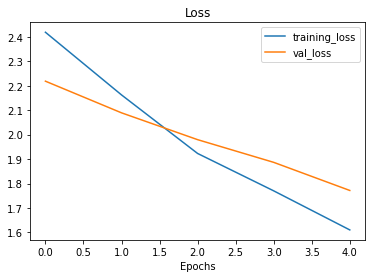

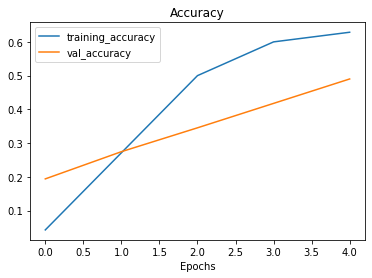

In [31]:
plot_loss_curves(history_1_percent)

## model 2 : feature extraction transfer learning model with 10% data with data augmentation

In [32]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-08-26 12:09:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  30.9MB/s    in 5.2s    

2022-08-26 12:09:08 (30.9 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [33]:
unzip_data("10_food_classes_10_percent.zip")

In [34]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [35]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [36]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode = "categorical",
                                                                            image_size =  IMG_SIZE,
                                                                            )

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = IMG_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [37]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

In [38]:
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
],name = "data_augmentation")

In [39]:
input_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = "input_layers")
x = data_augmentation(inputs)
x = base_model(x,training = False)
x = layers.GlobalAveragePooling2D(name = 'global_average_pooling_2D')(x)
outputs = layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

### creating a model checkpoint callback

In [40]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

In [41]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                          save_weights_only = True,
                                                          save_best_only = False,
                                                          save_freq = 'epoch',
                                                          verbose = 1)

In [42]:
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs = initial_epochs,
                                          validation_data = test_data,
                                          validation_steps = int(0.25 * len(test_data)),
                                          callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning',
                                                                                  experiment_name = "10_percent_data_aug"),
                                                       checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220826-120912
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0082 - accuracy: 0.3293
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 506ms/step - loss: 2.0082 - accuracy: 0.3293 - val_loss: 1.5327 - val_accuracy: 0.6266
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3714 - accuracy: 0.6867
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 402ms/step - loss: 1.3714 - accuracy: 0.6867 - val_loss: 1.0751 - val_accuracy: 0.7599
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0547 - accuracy: 0.7467
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 389ms/step - loss: 1.0547 - accuracy: 0.7467 - val_loss: 0.8794 - val_accuracy: 0.7763
E

In [43]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 68ms/step - loss: 0.6109 - accuracy: 0.8416


[0.6109258532524109, 0.8416000008583069]

In [44]:
result_10_percent_data_aug =model_2.evaluate(test_data)

79/79 [==============================] - 6s 68ms/step - loss: 0.6948 - accuracy: 0.8120


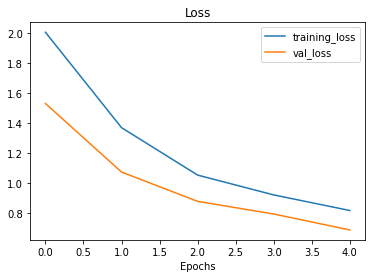

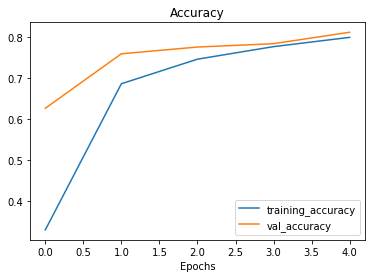

In [45]:
plot_loss_curves(history_10_percent_data_aug)

## loading in checkpoint

In [46]:
model_2.load_weights(checkpoint_path)

In [47]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 6s 69ms/step - loss: 0.6948 - accuracy: 0.8120


In [48]:
result_10_percent_data_aug == loaded_weights_model_results

False

In [49]:
result_10_percent_data_aug

[0.6948186755180359, 0.8119999766349792]

In [50]:
loaded_weights_model_results

[0.694818913936615, 0.8119999766349792]

#model 3: Fine-tuning on existing model on 10% of the data

In [51]:
model_2.layers

In [52]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f275f2d3c10> True
<keras.engine.sequential.Sequential object at 0x7f2756dbe9d0> True
<keras.engine.functional.Functional object at 0x7f275c038b10> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f2756dc1b50> True
<keras.layers.core.dense.Dense object at 0x7f275c0d1ad0> True


In [53]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [54]:
print(len(model_2.layers[2].trainable_variables))

0


In [55]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [56]:
for i , layer in enumerate(model_2.layers[2].layers):
  print(i , layer.name , layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [57]:
print(len(model_2.trainable_variables))

12


In [58]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                                epochs = fine_tune_epochs,
                                                validation_data = test_data,
                                                validation_steps = int(0.25 * len(test_data)),
                                                initial_epoch = history_10_percent_data_aug.epoch[-1],
                                                callbacks = [create_tensorboard_callback(dir_name='transfer_learning',
                                                                                         experiment_name= '10_percent_fine_tune_last_10')])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220826-121025
Epoch 5/10
24/24 [==============================] - 17s 420ms/step - loss: 0.6985 - accuracy: 0.7987 - val_loss: 0.5861 - val_accuracy: 0.8026
Epoch 6/10
24/24 [==============================] - 8s 345ms/step - loss: 0.5538 - accuracy: 0.8320 - val_loss: 0.5617 - val_accuracy: 0.8158
Epoch 7/10
24/24 [==============================] - 8s 319ms/step - loss: 0.4896 - accuracy: 0.8400 - val_loss: 0.5646 - val_accuracy: 0.8076
Epoch 8/10
24/24 [==============================] - 9s 370ms/step - loss: 0.4356 - accuracy: 0.8680 - val_loss: 0.4743 - val_accuracy: 0.8306
Epoch 9/10
24/24 [==============================] - 8s 337ms/step - loss: 0.4385 - accuracy: 0.8653 - val_loss: 0.4863 - val_accuracy: 0.8306
Epoch 10/10
24/24 [==============================] - 8s 335ms/step - loss: 0.3966 - accuracy: 0.8760 - val_loss: 0.5180 - val_accuracy: 0.8257


In [60]:
result_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 6s 68ms/step - loss: 0.4981 - accuracy: 0.8328


In [61]:
result_10_percent_data_aug

[0.6948186755180359, 0.8119999766349792]

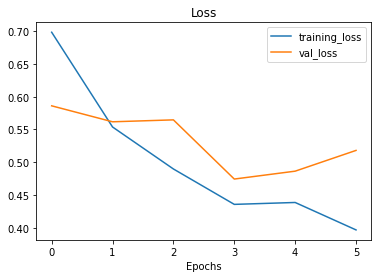

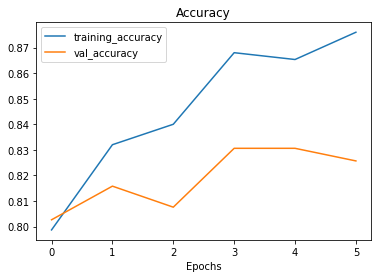

In [62]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [75]:
def compare_history(original_history, new_history, initial_epochs=5):
  """
  Compare two tensorflow history objects

  """
  
  acc = original_history.history['accuracy']
  loss = original_history.history['loss']

  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = acc + new_history.history['val_accuracy']
  total_val_loss = loss + new_history.history['val_loss']

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label= 'training accuracy')
  plt.plot(total_val_acc, label = 'val accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(),label='start fine tuning')
  plt.legend(loc= "lower right")
  plt.title("Training and Validation accuracy")

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_loss, label= 'training loss')
  plt.plot(total_val_loss, label = 'val loss')
  plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(),label='start fine tuning')
  plt.legend(loc= "upper right")
  plt.title("Training and Validation loss")







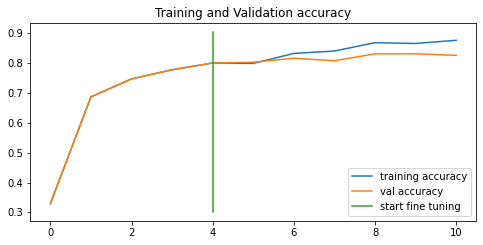

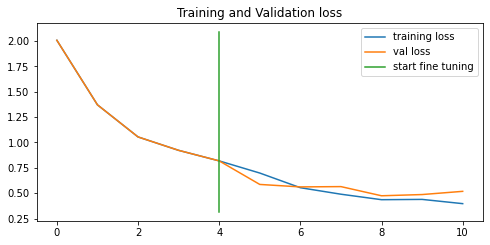

In [76]:
compare_history(history_10_percent_data_aug,
                history_fine_10_percent_data_aug,
                initial_epochs = 5)